In [24]:
import pandas as pd
import matplotlib
import random
import matplotlib.pyplot as plt
import numpy as np
from dsutil.plotting import *

from faker import Faker
from platform import python_version

In [2]:
python_version(), pd.__version__, matplotlib.__version__

('3.8.10', '1.3.2', '3.4.3')

## plot histogram for dataframe column

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


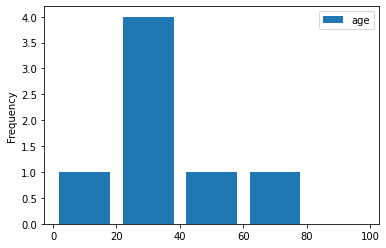

In [3]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

display(df)
df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

## relative histogram

(0.0, 1.0)

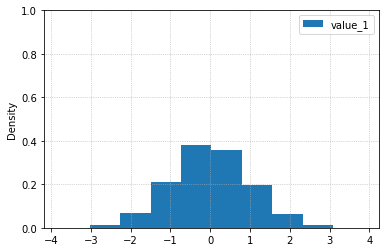

In [48]:
import scipy.stats as st

random.seed(44)

dist_1 = st.norm(loc=0.0,scale=1.0)

df1 = pd.DataFrame({
    'value_1': dist_1.rvs(10000),
})

plt.clf()
ax = plt.gca()

df1.plot(kind='hist', density=True, ax=ax)
# df1.plot(ax=ax, kind='hist')

add_grid()
ax.set_ylabel('Density')
ax.set_ylim(0,1)

## two histograms put together

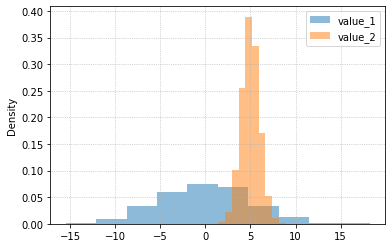

In [53]:
import scipy.stats as st

random.seed(44)

dist_1 = st.norm(loc=0.0,scale=5.0)
dist_2 = st.norm(loc=5,scale=1.0)

nums_1 = dist_1.rvs(1000)
nums_2 = dist_2.rvs(10000)

df1 = pd.DataFrame({
    'value_1': nums_1,
})

df2 = pd.DataFrame({
    'value_2': nums_2,
})

plt.clf()
ax = plt.gca()

df1.plot(kind='hist', ax=ax, density=True, alpha=0.5)
df2.plot(kind='hist', ax=ax, density=True, alpha=0.5)

ax.set_ylabel('Density')

add_grid()

## group large values in "others" bucket

In [4]:
random.seed(44)

fake = Faker()

df = pd.DataFrame([{
    'name':fake.name(),
    'age': random.randint(1,120),
} for i in range(0,100)])

df.sample(5)

,name,age
9,Ashley Moss,38
62,Troy Wright,7
73,Kelly Hodge,95
87,Katherine Mejia,30
39,Michael Combs,9


/tmp/ipykernel_17972/1535118683.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format_text(x, max_value, '+∞') for x in current_ticklabels])


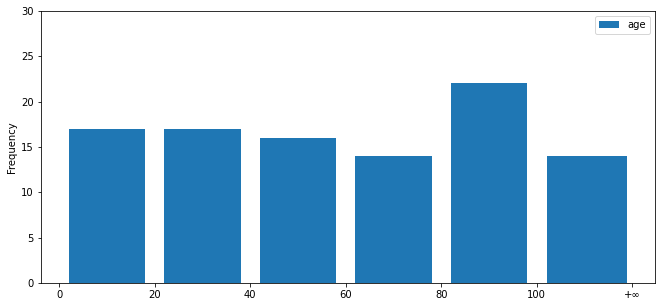

In [5]:
fake = Faker()

random.seed(44)

# function to format the label
def format_text(current_value, max_value, label):
    return label if current_value > max_value else f'{current_value:.0f}'

# install via pip install faker
from faker import Faker

random.seed(44)

df = pd.DataFrame([{
    'name':fake.name(),
    'age': random.randint(1,120),
} for i in range(0,100)])

# define the bins
step_size          = 20
max_tick           = 100 
original_bins      = np.arange(0, max_tick+1, step_size)
new_bins           = np.append(original_bins, [max_tick+step_size+1])
max_value          = max(original_bins)

df[['age']].plot(kind='hist', bins=new_bins, rwidth=0.8)

current_ticklabels = plt.gca().get_xticks()

plt.gca().set_xticklabels([format_text(x, max_value, '+∞') for x in current_ticklabels])
plt.gca().set_ylim(0,30)
plt.gcf().set_size_inches(11,5)
plt.show()
